In [2]:
# Load Basic Libraries for Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing Random Forest Model from Scikit Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

In [4]:
# Importing the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [5]:
X = mnist['data']
y = mnist['target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, stratify = y)

### Data Visualization

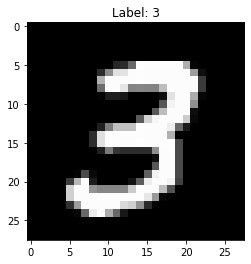

In [8]:
i = 7
img = np.array(X_train.loc[i]).reshape((28,28))
label = y_train.loc[i]

plt.title('Label: {}'.format(label))
plt.imshow(img,cmap='gray')

plt.show()

In [9]:
# The dataset is comprised of 28*28 pixel images of digits.
# Our goal is to be able to classify them using a Random Forest Classifier.

### Random Forest with 20 Trees 

In [10]:
model_20 = RandomForestClassifier(n_estimators=100,max_depth=20)
model_20.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [11]:
y_pred_20 = model_20.predict(X_test)
acc_20 = accuracy_score(y_test,y_pred_20)
print("The accuracy of the Model with depth 20 trees is: {}".format(acc_20))

The accuracy of the Model with depth 20 trees is: 0.9665142857142857


<AxesSubplot:>

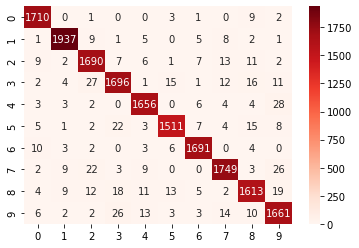

In [12]:
cfm_20 = confusion_matrix(y_test,y_pred_20)
sns.heatmap(cfm_20,annot=True,fmt='d',cmap='Reds')

### Random Forest with depth 50 Trees

In [13]:
model_50 = RandomForestClassifier(max_depth=50)
model_50.fit(X_train,y_train)

RandomForestClassifier(max_depth=50)

In [14]:
lis = [estimator.tree_.max_depth for estimator in model_50.estimators_]
print(lis)
print("\nMaximum Depth of the Tree: {}".format(max(lis)))

[33, 31, 27, 31, 34, 27, 35, 34, 32, 35, 38, 34, 34, 31, 30, 30, 29, 38, 37, 32, 37, 37, 35, 35, 37, 31, 33, 33, 35, 32, 31, 31, 32, 35, 28, 34, 30, 30, 35, 29, 31, 34, 33, 33, 32, 31, 39, 31, 34, 31, 33, 36, 39, 33, 31, 32, 36, 33, 35, 32, 34, 36, 33, 35, 32, 32, 33, 30, 36, 28, 34, 33, 40, 27, 30, 32, 30, 31, 31, 37, 34, 33, 37, 32, 33, 30, 28, 32, 36, 32, 32, 28, 32, 39, 33, 35, 34, 35, 28, 29]

Maximum Depth of the Tree: 40


In [15]:
# As our random forest model has trees upto a maximum depth 43, 50 seems to be a good upper bound.

In [16]:
y_pred_50 = model_50.predict(X_test)
acc_50 = accuracy_score(y_test,y_pred_50)
print("The accuracy of the Model with depth 50 trees is: {}".format(acc_50))

The accuracy of the Model with depth 50 trees is: 0.9672571428571428


<AxesSubplot:>

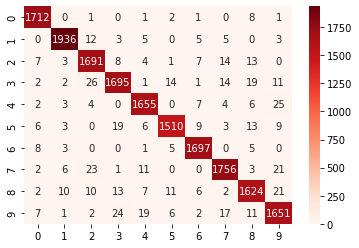

In [17]:
cfm_50 = confusion_matrix(y_test,y_pred_50)
sns.heatmap(cfm_50,annot=True,fmt='d',cmap='Reds')

#### We can see that both Models perform really well with about 96.7% accuracy and there accuracy is almost the same.


In [18]:
# Creating a 10-Fold Cross Validation
kf = StratifiedKFold(n_splits= 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [19]:
## Cross Validation for 20 Trees
cv_20 = cross_val_score(RandomForestClassifier(max_depth=20),X,y,cv=kf)
for i in range(len(cv_20)):
    print("Accuracy of {}th Fold: {}".format(i+1,cv_20[i]))

print("\nAverage Accuracy of the Model with depth 20 trees is: {}".format(np.mean(cv_20)))

Accuracy of 1th Fold: 0.9722857142857143
Accuracy of 2th Fold: 0.9652857142857143
Accuracy of 3th Fold: 0.9685714285714285
Accuracy of 4th Fold: 0.9665714285714285
Accuracy of 5th Fold: 0.9624285714285714
Accuracy of 6th Fold: 0.9678571428571429
Accuracy of 7th Fold: 0.9622857142857143
Accuracy of 8th Fold: 0.9668571428571429
Accuracy of 9th Fold: 0.9684285714285714
Accuracy of 10th Fold: 0.9747142857142858

Average Accuracy of the Model with depth 20 trees is: 0.9675285714285715


### Model Accuracy for Depth = 20
![Model Accuracy](Model20.png)

In [20]:
## Cross Validation for 50 Trees
cv_50 = cross_val_score(RandomForestClassifier(max_depth=50),X,y,cv=kf)
for i in range(len(cv_50)):
    print("Accuracy of {}th Fold: {}".format(i+1,cv_50[i]))

print("\nAverage Accuracy of the Model with depth 50 trees is: {}".format(np.mean(cv_50)))

Accuracy of 1th Fold: 0.9737142857142858
Accuracy of 2th Fold: 0.967
Accuracy of 3th Fold: 0.9705714285714285
Accuracy of 4th Fold: 0.9674285714285714
Accuracy of 5th Fold: 0.9642857142857143
Accuracy of 6th Fold: 0.9688571428571429
Accuracy of 7th Fold: 0.9645714285714285
Accuracy of 8th Fold: 0.9707142857142858
Accuracy of 9th Fold: 0.9694285714285714
Accuracy of 10th Fold: 0.976

Average Accuracy of the Model with depth 50 trees is: 0.969257142857143


### Model Accuracy for Depth = 50
![Model Accuracy](Modell50.png)